markdown
Copy
## О датасете

Для итоговой работы выбран датасет **красного португальского вина «Vinho Verde»**  
🔗 [Официальный сайт Vinho Verde](http://www.vinhoverde.pt/en/)

### Особенности данных:
- Доступны только **физико-химические** (входные) и **сенсорные** (выходные) переменные  
  *(из-за проблем с конфиденциальностью отсутствуют данные о сортах винограда, марке вина, цене и т.д.)*  
- **Проблемы качества**:  
  - Нет гарантии, что все входные переменные релевантны  
  - Могут присутствовать некачественные вина, но их доля мала  

---

## Ход работы

### 1. Предварительный анализ
- 📊 Просмотр статистической информации  
- **Выводы**  

### 2. Предобработка данных
- 🧹 Очистка данных, поиск выбросов  
- 📈 Визуализация распределений  
- **Выводы**  

### 3. Поиск аномалий
- 🔍 Применение методов обнаружения аномалий  
- **Выводы**  

### 4. Сравнительная визуализация
- 👁️ Визуализация данных до и после обработки  
- **Выводы**  

### 5. Кластеризация
- 🤖 Выбор алгоритмов кластеризации  
- ⚙️ Подбор параметров моделей
- 📊 Сравнительные визуализации 
- **Выводы**  

### 6. Практические выводы

In [1]:
import pandas as pd
import my_module as mod
import data_loader as loader
import logging
import warnings

# Отключение предупреждений
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Настройка логирования с выводом сообщений в консоль
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Загрузка данных 
dataFRed = loader.load_dataF_csv("winequality-red.csv")

2025-04-01 22:36:29,406 - INFO - Загрузка данных из CSV файла: winequality-red.csv
2025-04-01 22:36:29,414 - INFO - Данные успешно загружены


In [2]:
# вывод статистической информации
mod.statistic_dataF(dataFRed)

2025-04-01 22:36:29,420 - INFO - Вывод статистической информации о данных.
2025-04-01 22:36:29,420 - INFO - Первые строки данных:
2025-04-01 22:36:29,433 - INFO - Основная информация о данных:
2025-04-01 22:36:29,445 - INFO - Описательная статистика:
2025-04-01 22:36:29,466 - INFO - Проверка на пропущенные значения:


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
# вывод информации о дублях
mod.double(dataFRed)


2025-04-01 22:36:29,482 - INFO - Вывод информации о дублях.


Общее количество дубликатов: 240


In [4]:
# Дублей много, удалим их
dataFRed_unique_old = mod.drop_double(dataFRed)


In [5]:
# убедимся, что дубли удалены, вывод информации о дублях
mod.double(dataFRed_unique_old)

2025-04-01 22:36:29,529 - INFO - Вывод информации о дублях.


Общее количество дубликатов: 0


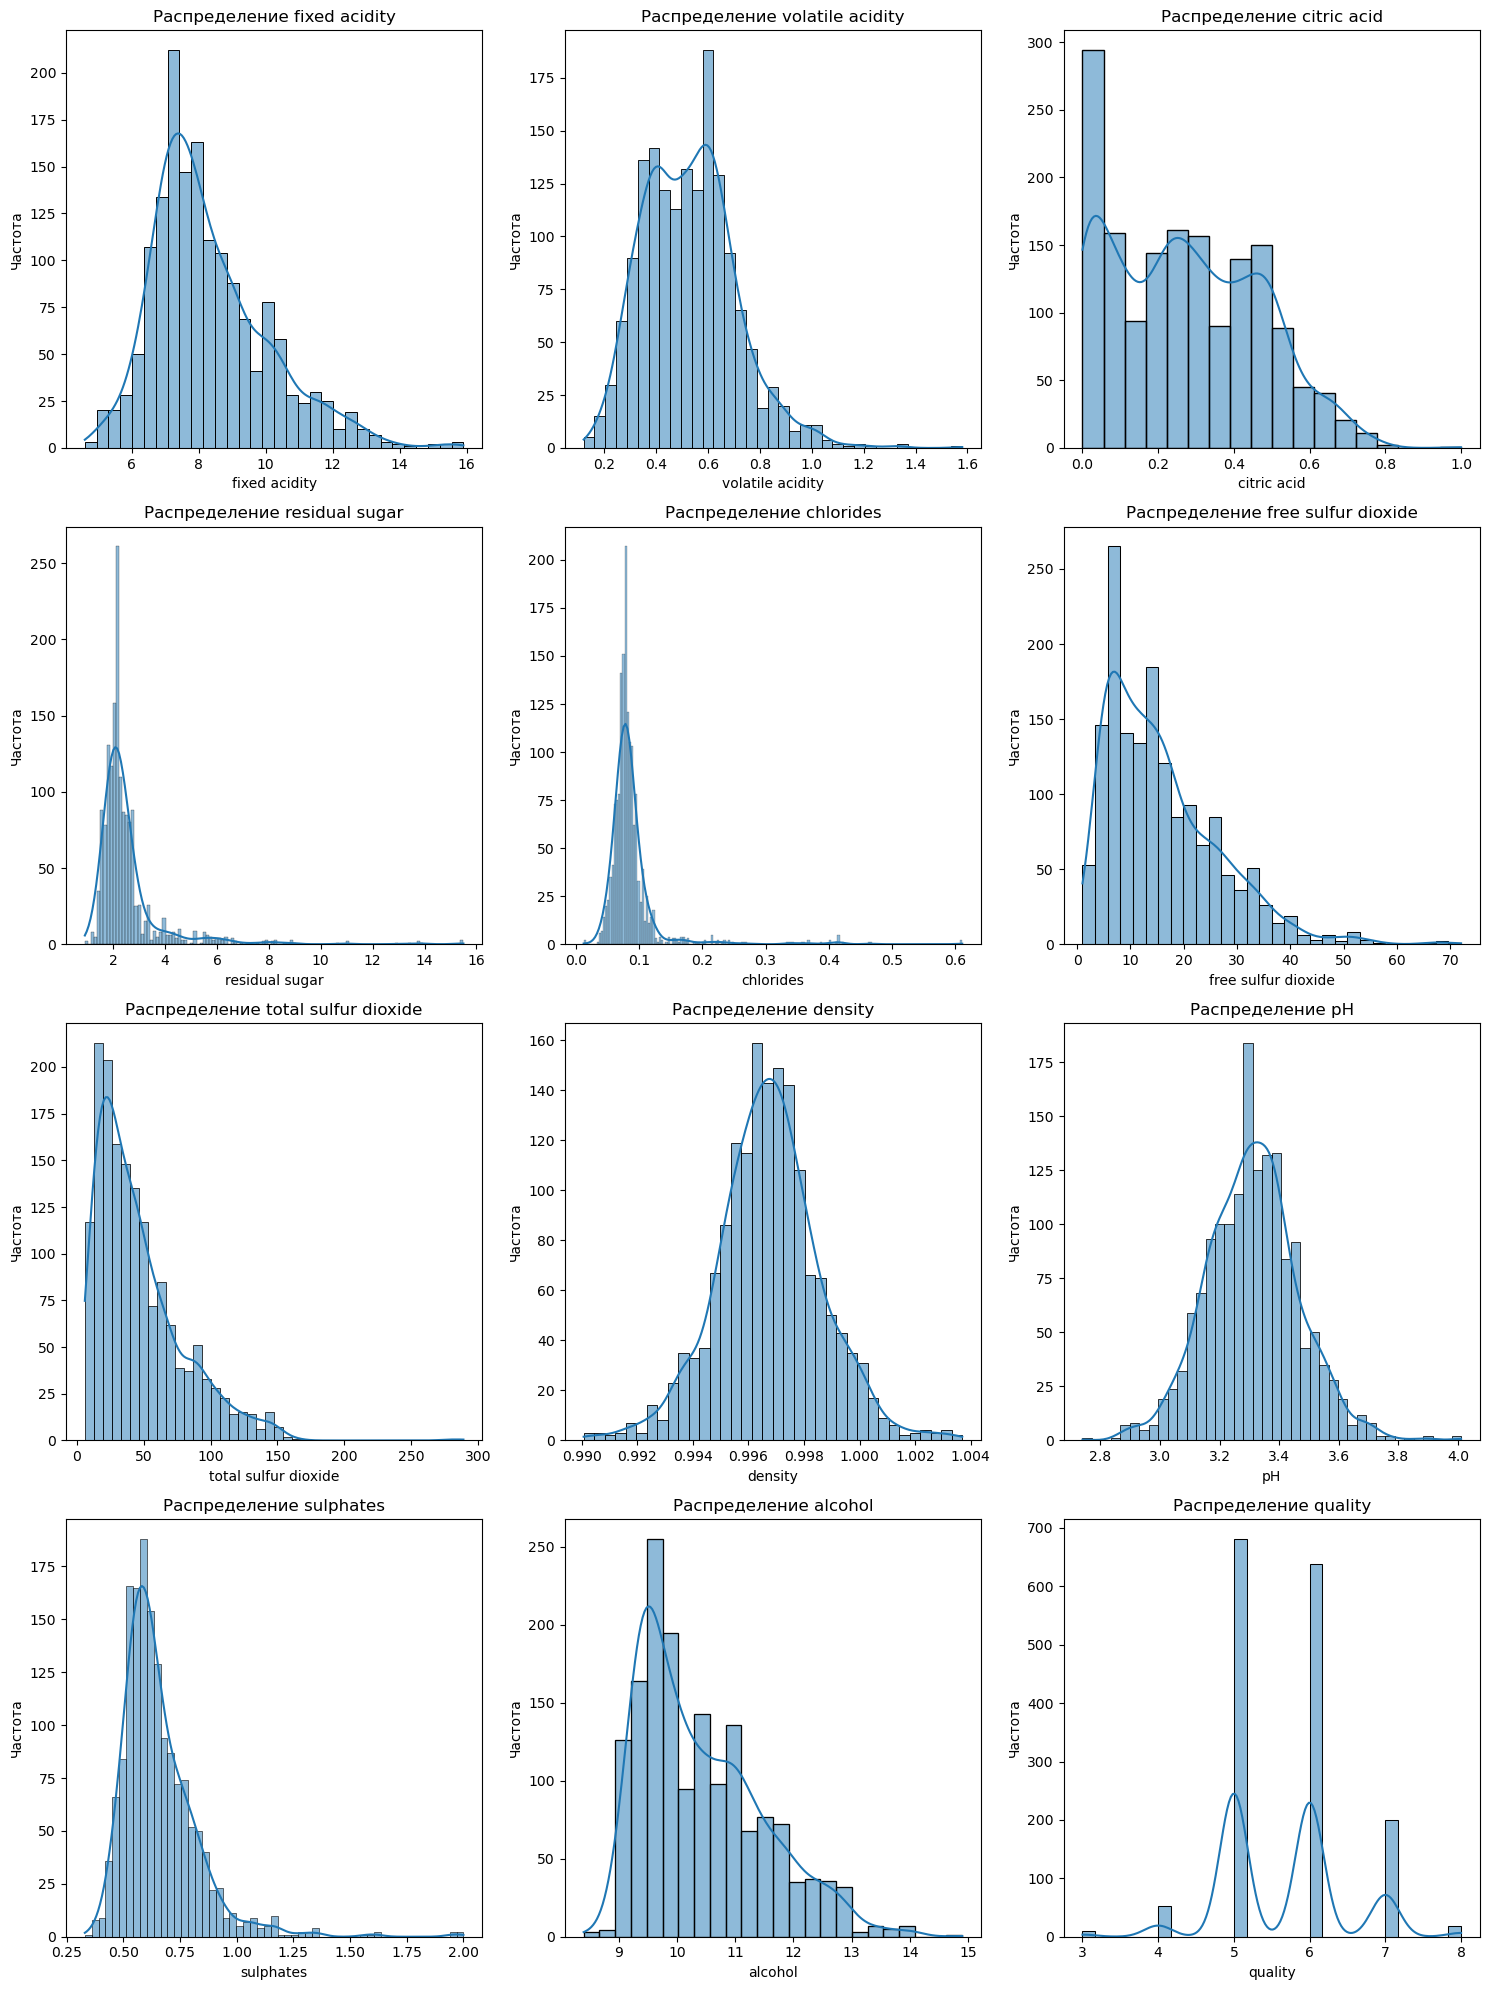

In [6]:
# посмотрим на распределений данных
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Рассчитываем количество строк и столбцов
num_columns = len(dataFRed_unique_old.columns)
cols_per_row = 3  # Количество графиков в строке
num_rows = math.ceil(num_columns / cols_per_row)  # Количество строк

# Создаем сетку графиков
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(15, 5 * num_rows))

# Построение гистограмм для каждого столбца
for i, column in enumerate(dataFRed_unique_old.columns):
    row = i // cols_per_row  # Номер строки
    col = i % cols_per_row   # Номер столбца
    sns.histplot(dataFRed[column], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Распределение {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Частота')

# Удаление пустых графиков, если количество столбцов не кратно 3
for i in range(num_columns, num_rows * cols_per_row):
    row = i // cols_per_row
    col = i % cols_per_row
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [7]:
mod.unique_values(dataFRed_unique_old, 'quality')

2025-04-01 22:36:33,009 - INFO - Вывод уникальных значений для колонки quality.


[5 6 7 4 8 3]


**Вывод:** датасет небольшой, категориальных значений нет, пропусков нет, обнаружены дубли (удалены), распределение данных близко к нормальному, есть вбросы, есть дискретная величина(quality).

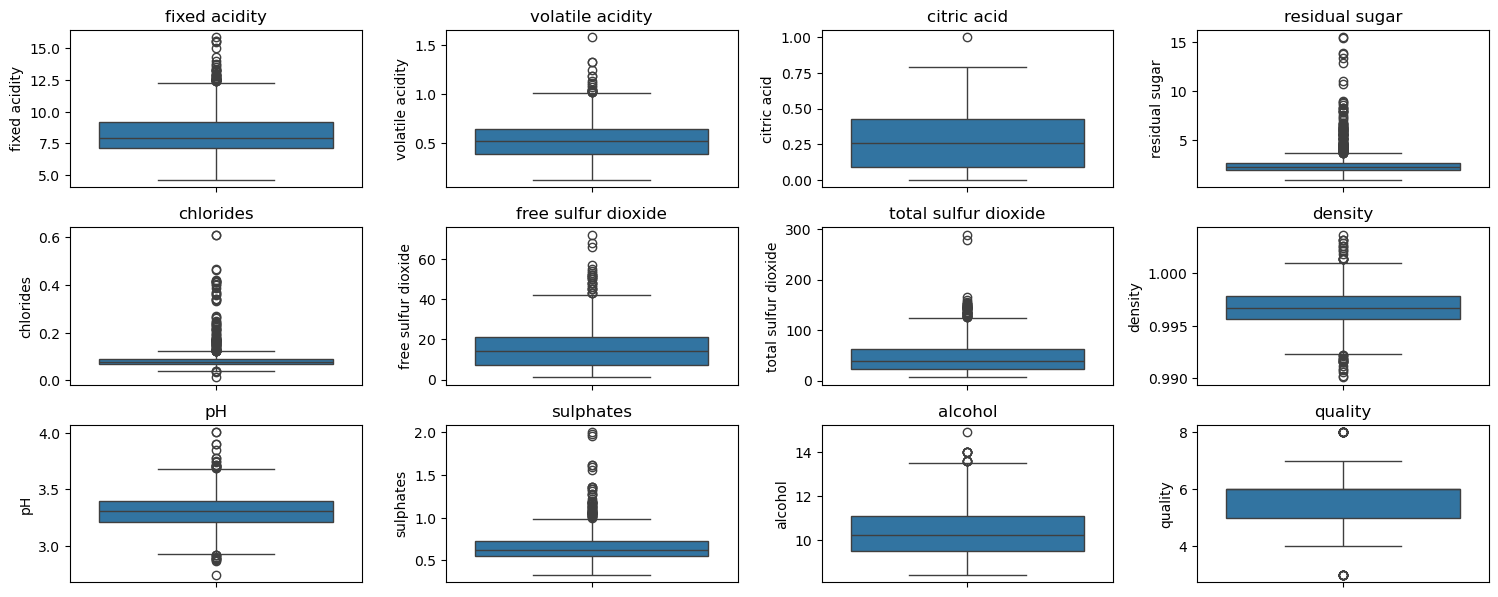

In [8]:
# визуализируем выбросы 
import plot

numerical_features_old = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'] 
plot.box(dataFRed_unique_old, numerical_features_old)


**Вывод:** выбросы есть во всех признаках

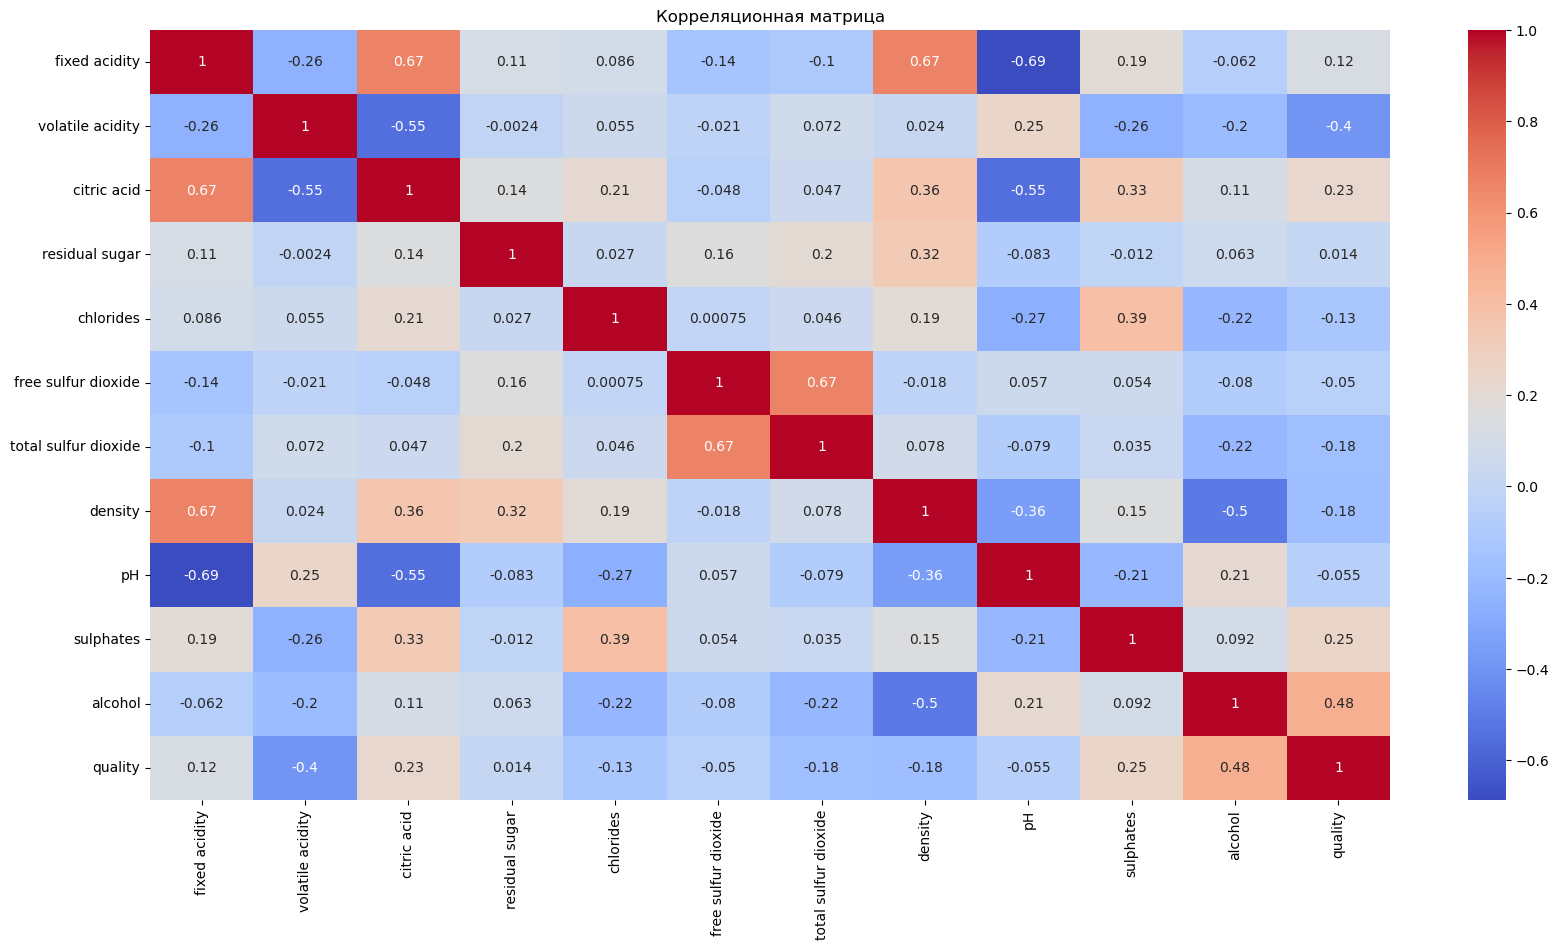

In [9]:
# до начала работы с выбросами посмотрим на корреляцию
import matplotlib.pyplot as plt
import seaborn as sns

# Построение корреляционной матрицы
plt.figure(figsize=(20, 10))
sns.heatmap(dataFRed_unique_old.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

- **Вывод:** "fixed acidity" коррелицию с "ph" и "citric acid" так как фиксированная кислотность напрямую обеспечивается наличием в вине кислот таких как винная, лимонная("citric acid") или яблочная кислоты, и уровень  "ph"  - это непосредственное представление их наличия, поэтому уберем графы "fixed acidity" и "citric acid". Так же высокая корреляция "free sulfur dioxide" и "total sulfur dioxide" - так как по сути описывают один и тот же признак, удалим "free sulfur dioxide"
 

In [10]:
dataFRed_unique = dataFRed_unique_old.copy()  # Создаем явную копию

if 'fixed acidity' in dataFRed_unique.columns:
    dataFRed_unique.drop('fixed acidity', axis=1, inplace=True)

if 'citric acid' in dataFRed_unique.columns:
    dataFRed_unique.drop('citric acid', axis=1, inplace=True)  

if 'free sulfur dioxide' in dataFRed_unique.columns:
    dataFRed_unique.drop('free sulfur dioxide', axis=1, inplace=True)     

numerical_features = ['volatile acidity','residual sugar','chlorides','total sulfur dioxide','density','pH','sulphates','alcohol','quality'] 

In [11]:
# применим масштабирование RobustScaler так как есть выбросы
from sklearn.preprocessing import RobustScaler

data_scaled = dataFRed_unique.copy()
numeric_cols = data_scaled.select_dtypes(include=['float64', 'int64']).columns
scaler = RobustScaler()
data_scaled[numeric_cols] = scaler.fit_transform(data_scaled[numeric_cols])

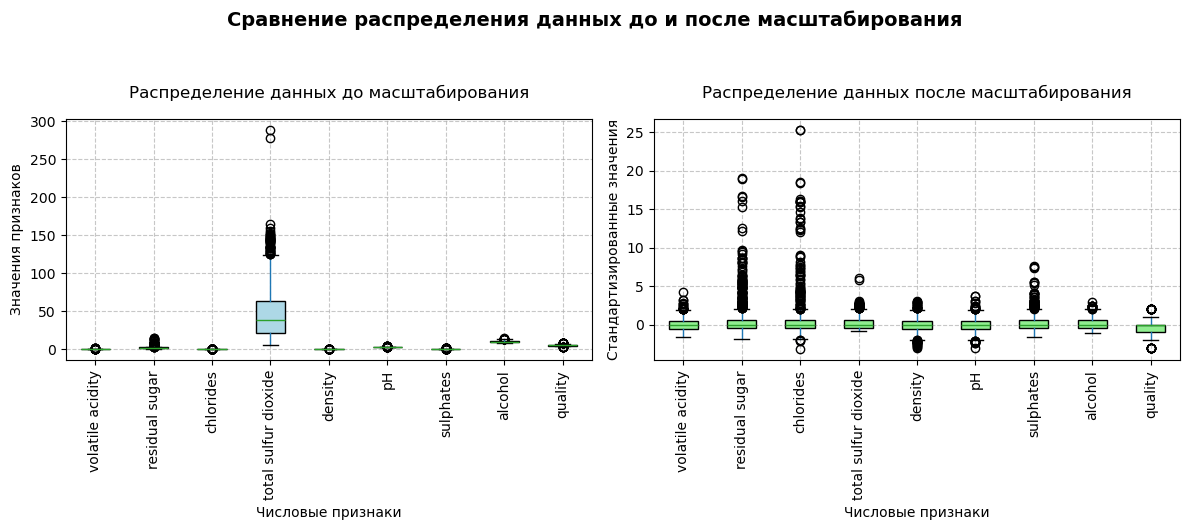

In [12]:
# визуализируем до и после масштабирования
# Создаем фигуру и оси перед построением графиков
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# До масштабирования
dataFRed_unique[numeric_cols].boxplot(ax=ax1, patch_artist=True,
                                    boxprops=dict(facecolor='lightblue'))
ax1.set_title('Распределение данных до масштабирования', pad=15, fontsize=12)
ax1.set_xlabel('Числовые признаки', fontsize=10)
ax1.set_ylabel('Значения признаков', fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.tick_params(axis='x', rotation=90)

# После масштабирования
data_scaled[numeric_cols].boxplot(ax=ax2, patch_artist=True,
                                boxprops=dict(facecolor='lightgreen'))
ax2.set_title('Распределение данных после масштабирования', pad=15, fontsize=12)
ax2.set_xlabel('Числовые признаки', fontsize=10)
ax2.set_ylabel('Стандартизированные значения', fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.tick_params(axis='x', rotation=90)

# Общий заголовок
plt.suptitle('Сравнение распределения данных до и после масштабирования', 
             y=1.05, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

- **Вывод:** визаулизация стала нагляднее 


In [13]:
target = 'quality'  # будем исключать дискретную величину из анализа на выбросы

In [14]:
# IQR - первый способ 
outliers_1, cleaned_1 = mod.get_outliers_iqr(data_scaled, target)
mod.clean_statistic (data_scaled, cleaned_1, outliers_1)
# plot.box(cleaned_1, numerical_features)


Детальный отчет о выбросах:

Столбец: volatile acidity
Границы: [-2.02, 1.98]
Диапазон данных: [-1.60, 4.24]
Найдено выбросов: 19

Столбец: residual sugar
Границы: [-1.93, 2.07]
Диапазон данных: [-1.86, 19.00]
Найдено выбросов: 126

Столбец: chlorides
Границы: [-1.93, 2.07]
Диапазон данных: [-3.19, 25.33]
Найдено выбросов: 87

Столбец: total sulfur dioxide
Границы: [-1.89, 2.11]
Диапазон данных: [-0.78, 6.12]
Найдено выбросов: 45

Столбец: density
Границы: [-2.00, 2.00]
Диапазон данных: [-2.99, 3.15]
Найдено выбросов: 35

Столбец: pH
Границы: [-2.03, 1.97]
Диапазон данных: [-3.00, 3.68]
Найдено выбросов: 28

Столбец: sulphates
Границы: [-1.89, 2.11]
Диапазон данных: [-1.61, 7.67]
Найдено выбросов: 55

Столбец: alcohol
Границы: [-1.94, 2.06]
Диапазон данных: [-1.12, 2.94]
Найдено выбросов: 13

            СТАТИСТИКА ОЧИСТКИ ДАННЫХ             
Исходный размер датафрейма:    1359
Удалено строк (выбросы):       303 (22.30%)
Осталось строк:                1056 (77.70%)



In [15]:
# IsolationForest - второй способ
outliers_2, cleaned_2 = mod.detect_outliers_isolation(data_scaled, target)
# Размеры до и после очистки
mod.clean_statistic (data_scaled, cleaned_2, outliers_2)
# plot.box(cleaned_2, numerical_features)


            СТАТИСТИКА ОЧИСТКИ ДАННЫХ             
Исходный размер датафрейма:    1359
Удалено строк (выбросы):       68 (5.00%)
Осталось строк:                1291 (95.00%)



In [16]:
# применим IQR и IsolationForest друг за другом
outliers_3, cleaned_3 = mod.get_outliers_combined(data_scaled, target)
mod.clean_statistic (data_scaled, cleaned_3, outliers_3)
# plot.box(cleaned_1, numerical_features)


            СТАТИСТИКА ОЧИСТКИ ДАННЫХ             
Исходный размер датафрейма:    1359
Удалено строк (выбросы):       356 (26.20%)
Осталось строк:                1003 (73.80%)



In [17]:
# Применим IQR, IsolationForest, LOF друг за другом 
# Эксперименты с параметрами:
params = {
    'iqr_multiplier': 2.5,  # Уменьшайте для большей агрессивности (1.5-3)
    'iso_contamination': 0.1,  # Доля выбросов для Isolation Forest (0.05-0.2)
    'lof_contamination': 0.1,  # Доля выбросов для LOF (0.05-0.2)
    'lof_neighbors': 20  # Количество соседей для LOF (10-50)
}

# Первый проход
outliers_4, cleaned_4 = mod.detect_outliers_three_stages(data_scaled, target, params)
mod.clean_statistic (data_scaled, cleaned_4, outliers_4)

# Второй проход на очищенных данных
outliers_5, cleaned_5 = mod.detect_outliers_three_stages(cleaned_4)
mod.clean_statistic (cleaned_4, cleaned_5, outliers_5 )
# plot.box(cleaned_5, numerical_features)


            СТАТИСТИКА ОЧИСТКИ ДАННЫХ             
Исходный размер датафрейма:    1359
Удалено строк (выбросы):       273 (20.09%)
Осталось строк:                1086 (79.91%)


            СТАТИСТИКА ОЧИСТКИ ДАННЫХ             
Исходный размер датафрейма:    1086
Удалено строк (выбросы):       159 (14.64%)
Осталось строк:                927 (85.36%)



In [18]:
# Настройка агрессивных параметров  для IQR +IsolationForest + LOF 
aggressive_params = {
    'iqr_multiplier': 1.8,       # Более строгие границы
    'iso_contamination': 0.15,    # Больше ожидаемых выбросов
    'lof_contamination': 0.15,
    'lof_neighbors': 15           # Меньше соседей для чувствительности
}
# Первый проход
outliers_6, cleaned_6 = mod.detect_outliers_three_stages(data_scaled, target, aggressive_params)
mod.clean_statistic (data_scaled, cleaned_6, outliers_6)

# Второй проход на очищенных данных
outliers_7, cleaned_7 = mod.detect_outliers_three_stages(cleaned_6)
mod.clean_statistic (cleaned_6, cleaned_7, outliers_7)
# plot.box(cleaned_7, numerical_features)


            СТАТИСТИКА ОЧИСТКИ ДАННЫХ             
Исходный размер датафрейма:    1359
Удалено строк (выбросы):       388 (28.55%)
Осталось строк:                971 (71.45%)


            СТАТИСТИКА ОЧИСТКИ ДАННЫХ             
Исходный размер датафрейма:    971
Удалено строк (выбросы):       148 (15.24%)
Осталось строк:                823 (84.76%)



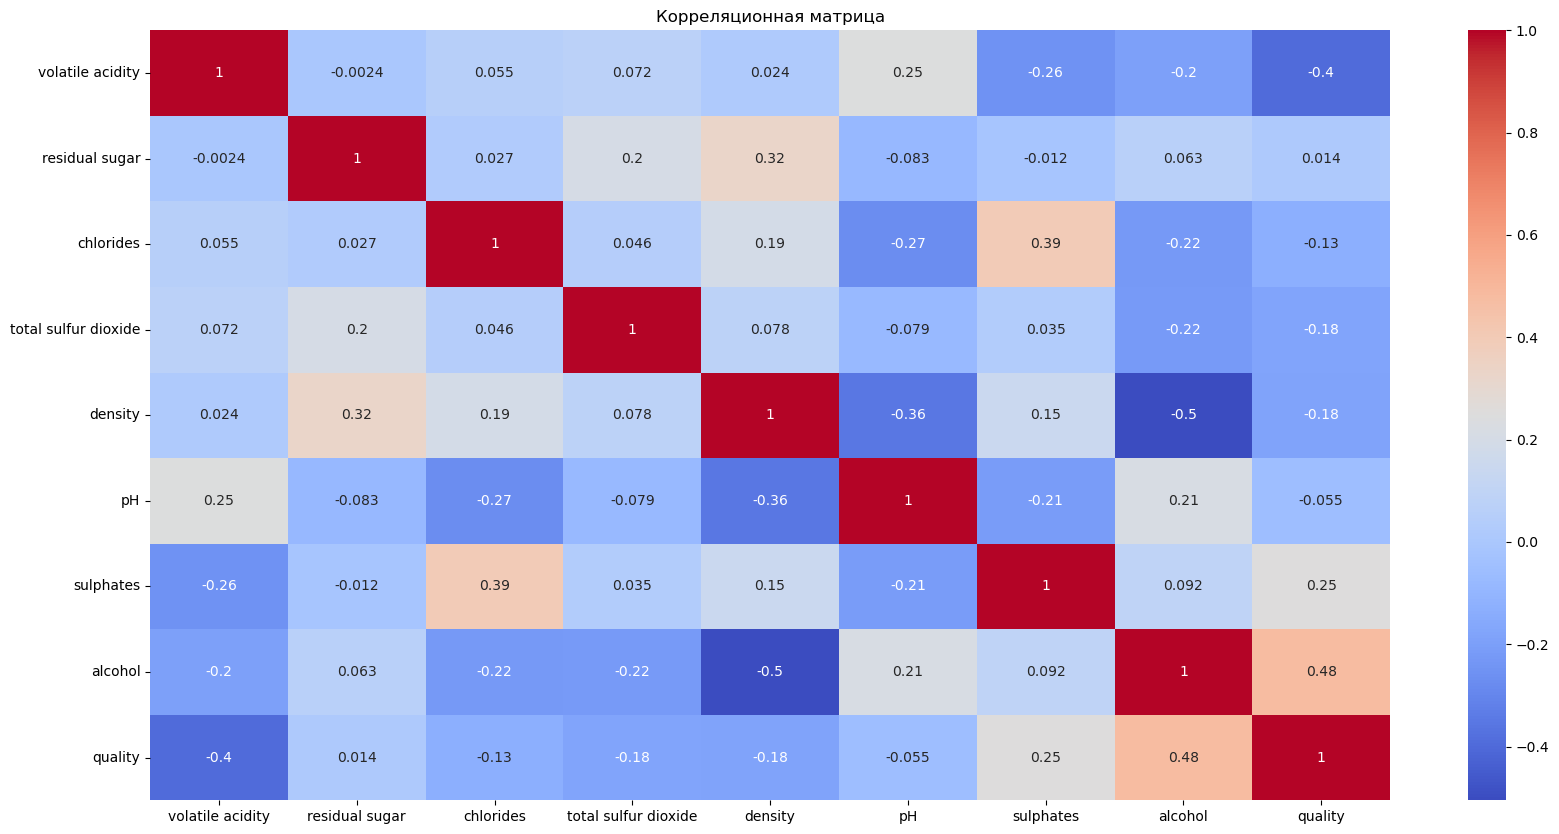

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение корреляционной матрицы
plt.figure(figsize=(20, 10))
sns.heatmap(data_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

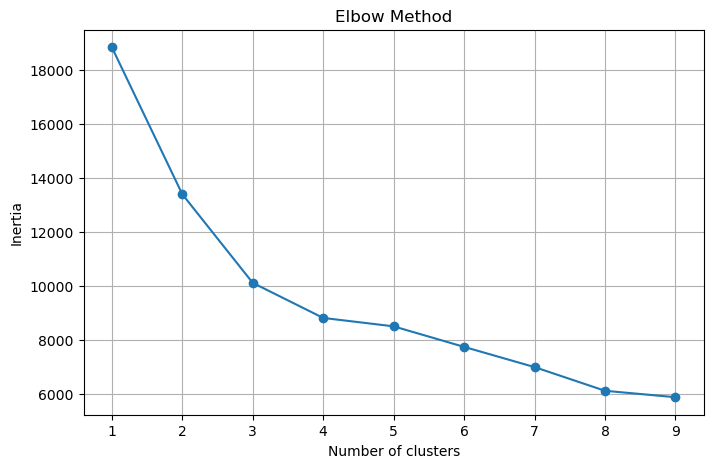

In [20]:
from sklearn.cluster import KMeans

# Вычисляем инерцию для разного числа кластеров
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

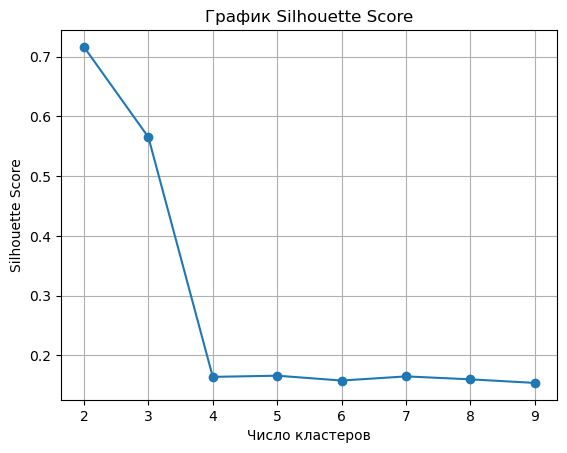

In [21]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette Score')
plt.title('График Silhouette Score')
plt.grid()
plt.show()

- **Вывод** оптимальное число кластеров 4

In [22]:
# Детекция аномалий для очищенных разными способами датасетов (проанализируем все подготовленные датасеты)
import os
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Создаем папку для сохранения результатов
output_dir = 'anomaly_detection_results'
os.makedirs(output_dir, exist_ok=True)

# Список датафреймов 
dataframes = {
    'Изначальный датасет': data_scaled, 
    'Cleaned_1 (IQR)': cleaned_1, 
    'Cleaned_2 (Isolation)': cleaned_2, 
    'Cleaned_3 (IQR+Isolation)': cleaned_3,
    'Cleaned_4 (IQR+Isolation+LOF)': cleaned_4,
    'Cleaned_5 (IQR+Isolation+LOF)': cleaned_5,
    'Cleaned_6 (IQR+Isolation+LOF)': cleaned_6,
    'Cleaned_7 (IQR+Isolation+LOF)': cleaned_7
}

# Файл для сохранения статистики
stats_file = os.path.join(output_dir, 'anomaly_stats_report.txt')

with open(stats_file, 'w', encoding='utf-8') as report:
    report.write("="*70 + "\n")
    report.write("{:^70}\n".format("ОТЧЕТ ПО ДЕТЕКЦИИ АНОМАЛИЙ"))
    report.write("="*70 + "\n\n")

    for df_name, df in dataframes.items():
        # Заголовок для текущего датафрейма
        report.write(f"\n{'='*70}\n")
        report.write(f"{f'СТАТИСТИКА АНОМАЛИЙ ({df_name})':^70}\n")
        report.write("="*70 + "\n")
        
        # Проверка на пустой датафрейм
        if df.empty:
            report.write("Датафрейм пуст, пропускаем...\n")
            report.write("="*70 + "\n")
            continue
            
        # Стандартизация данных
        scaler = StandardScaler()
        try:
            X_scaled = scaler.fit_transform(df)
        except ValueError as e:
            report.write(f"Ошибка: {str(e)}\n")
            report.write(f"Пропускаем {df_name}...\n")
            report.write("="*70 + "\n")
            continue
        
        # Инициализация и применение LOF
        lof = LocalOutlierFactor(
            n_neighbors=20,
            contamination='auto',
            novelty=False
        )
        y_pred = lof.fit_predict(X_scaled)
        
        # Расчет статистики
        total_points = len(y_pred)
        anomalies = np.sum(y_pred == -1)
        normal_points = total_points - anomalies
        anomaly_percentage = (anomalies / total_points) * 100
        
        # Сохранение статистики в файл
        report.write(f"Всего точек: {total_points}\n")
        report.write(f"Нормальные точки: {normal_points} ({100 - anomaly_percentage:.2f}%)\n")
        report.write(f"Аномалии: {anomalies} ({anomaly_percentage:.2f}%)\n")
        report.write("="*70 + "\n")
        
        # Визуализация (только если есть минимум 2 признака)
        if X_scaled.shape[1] >= 2:
            plt.figure(figsize=(10, 6))
            
            # Нормальные точки
            plt.scatter(
                X_scaled[y_pred == 1, 0], 
                X_scaled[y_pred == 1, 1], 
                c='blue', 
                label=f'Нормальные точки ({normal_points})',
                alpha=0.6,
                s=10
            )
            
            # Аномалии
            plt.scatter(
                X_scaled[y_pred == -1, 0], 
                X_scaled[y_pred == -1, 1], 
                c='red', 
                marker='x', 
                label=f'Аномалии ({anomalies})',
                s=60,
                linewidths=1.0
            )
            
            # Добавляем название датафрейма
            plt.annotate(df_name, 
                        xy=(0.05, 0.95), 
                        xycoords='axes fraction',
                        fontsize=10,
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            plt.title(f'Детекция аномалий методом LOF\nВсего точек: {total_points} | Аномалий: {anomalies} ({anomaly_percentage:.2f}%)',
                     fontsize=11, pad=15)
            plt.xlabel('Признак 1 (стандартизированный)', fontsize=9)
            plt.ylabel('Признак 2 (стандартизированный)', fontsize=9)
            plt.legend(fontsize=9, loc='upper right')
            plt.grid(True, linestyle=':', alpha=0.5)
            
            # Информация о методе
            plt.figtext(0.5, 0.01, 
                       "Метод: Local Outlier Factor (n_neighbors=20)", 
                       ha='center', fontsize=8, style='italic')
            
            plt.tight_layout()
            
            # Сохраняем график
            plot_filename = os.path.join(output_dir, f'lof_anomalies_{df_name.replace(" ", "_")}.png')
            plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
            plt.close()
            
            report.write(f"График сохранен как: {plot_filename}\n")
        else:
            report.write(f"Недостаточно признаков ({X_scaled.shape[1]}) для построения графика\n")
            report.write("Требуется минимум 2 признака\n")
        
        report.write("="*70 + "\n")

    report.write("\nАнализ всех датафреймов завершен!\n")

print(f"Все результаты сохранены в папку: {output_dir}")
print(f"Отчет по статистике: {stats_file}")

Все результаты сохранены в папку: anomaly_detection_results
Отчет по статистике: anomaly_detection_results\anomaly_stats_report.txt


- **Выводы** убедились, что различные способы удаления выбросов оставляют различный датасет на выходе, и, соответственно, различную почву для последующего анализа. С  целью  доподлинно убедиться в этом и была приведена выше столь подробная визуализация. Все последующие шаги были проделаны для всех вновь полученных  датасетов. Очень разные результаты были получены при кластеризации, но лучше всего выбранные алгоритмы справились именно с исходным датасетом(после удаления повторов и признаков с высокой корреляцией). Поэтому весь  подробный сравнительный анализ ниже был удален, и все исселодования приведены для одного датасета - который обеспечил данную работу наибольшей практической ценностью и выводами.


               СТАТИСТИКА АНОМАЛИЙ                
Всего точек: 1359
Количество аномалий: 68
Процент аномалий: 5.00%



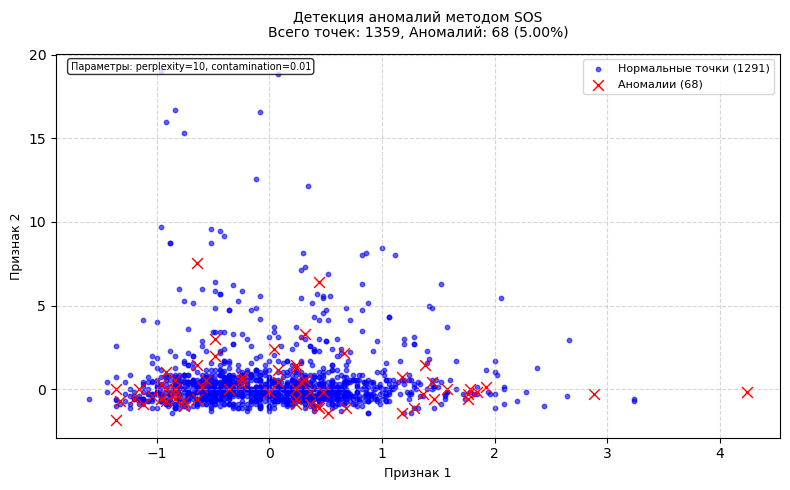


Дескриптивная статистика оценок аномальности:
Минимальная оценка: 0.0418
Средняя оценка: 0.3894
Максимальная оценка: 0.9849
Медианная оценка: 0.3424


In [23]:
# поиск аномалий методом SOS
from pyod.models.sos import SOS
import matplotlib.pyplot as plt
import numpy as np

# Инициализация модели
model = SOS(
    perplexity=20,  # Аналог n_neighbors в LOF - регулирует "локальность" анализа ставим так же 20
    contamination=0.05,  # Доля ожидаемых аномалий (1%)
    metric='euclidean'
)

# Преобразуем DataFrame в array
X = data_scaled.values if hasattr(data_scaled, 'values') else data_scaled

# Обучение модели и предсказание
model.fit(X)
anomaly_scores = model.decision_scores_  # Получаем оценки аномальности
anomaly_labels = model.labels_  # Бинарные метки (0 - норма, 1 - аномалия)

# Рассчитываем статистику
total_points = len(anomaly_labels)
num_anomalies = sum(anomaly_labels)
percent_anomalies = (num_anomalies / total_points) * 100

# Выводим статистику
print("\n" + "="*50)
print("{:^50}".format("СТАТИСТИКА АНОМАЛИЙ"))
print("="*50)
print(f"Всего точек: {total_points}")
print(f"Количество аномалий: {num_anomalies}")
print(f"Процент аномалий: {percent_anomalies:.2f}%")
print("="*50 + "\n")

# Визуализация с увеличенными крестиками аномалий
plt.figure(figsize=(8, 5))  # Немного увеличим размер графика для лучшей видимости

# Разделяем на нормальные точки и аномалии
normal = X[anomaly_labels == 0]
anomalies = X[anomaly_labels == 1]

# Нормальные точки (маленькие)
plt.scatter(normal[:, 0], normal[:, 1], c='blue', s=10,
            alpha=0.6,  # Добавим прозрачность
            label=f'Нормальные точки ({total_points - num_anomalies})')

# Аномалии (крупные крестики)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', 
            marker='x', s=60,  # размер крестиков до 30
            linewidths=1.0,  # Немного увеличиваем толщину линий
            label=f'Аномалии ({num_anomalies})')

plt.title(f'Детекция аномалий методом SOS\nВсего точек: {total_points}, Аномалий: {num_anomalies} ({percent_anomalies:.2f}%)', 
          fontsize=10, pad=12)
plt.xlabel('Признак 1', fontsize=9)
plt.ylabel('Признак 2', fontsize=9)
plt.legend(fontsize=8, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# Добавим аннотацию с параметрами модели
plt.text(0.02, 0.98, f'Параметры: perplexity=10, contamination=0.01',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         fontsize=7)

plt.tight_layout()
plt.show()

# Дескриптивная статистика
print("\nДескриптивная статистика оценок аномальности:")
print(f"Минимальная оценка: {np.min(anomaly_scores):.4f}")
print(f"Средняя оценка: {np.mean(anomaly_scores):.4f}")
print(f"Максимальная оценка: {np.max(anomaly_scores):.4f}")
print(f"Медианная оценка: {np.median(anomaly_scores):.4f}")

- **Вывод:**  ожидали наличие аномалий 4-5%, так как провели предобработку и методом LOF их идентифицировали, 
В итоге 5% и получили

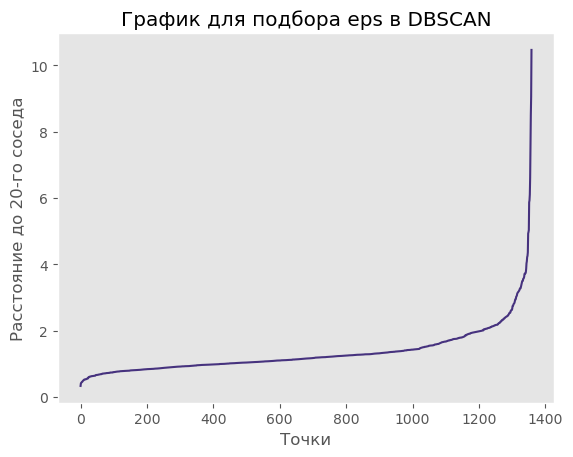

In [27]:
# Для  DBSCAN подберем eps
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(data_scaled)
distances, _ = nbrs.kneighbors(data_scaled)
distances = np.sort(distances[:, -1], axis=0)  # Сортируем расстояния

plt.plot(distances)
plt.xlabel('Точки')
plt.ylabel('Расстояние до 20-го соседа')
plt.title('График для подбора eps в DBSCAN')
plt.grid()
plt.show()


--------------------------------------------------
K-Means Cluster distribution:
Cluster 0: 811 points (59.7%)
Cluster 1: 449 points (33.0%)
Cluster 2: 29 points (2.1%)
Cluster 3: 70 points (5.2%)
Silhouette Score: 0.211
Calinski-Harabasz Score: 229.405

--------------------------------------------------
DBSCAN Cluster distribution:
Cluster -1: 88 points (6.5%)
Cluster 0: 1258 points (92.6%)
Cluster 1: 13 points (1.0%)
Silhouette Score: 0.404
Calinski-Harabasz Score: 73.356

--------------------------------------------------
Agglomerative Cluster distribution:
Cluster 0: 317 points (23.3%)
Cluster 1: 350 points (25.8%)
Cluster 2: 675 points (49.7%)
Cluster 3: 17 points (1.3%)
Silhouette Score: 0.171
Calinski-Harabasz Score: 202.364

--------------------------------------------------
Gaussian Mixture Cluster distribution:
Cluster 0: 182 points (13.4%)
Cluster 1: 1088 points (80.1%)
Cluster 2: 89 points (6.5%)
Silhouette Score: 0.224
Calinski-Harabasz Score: 116.430

-------------------

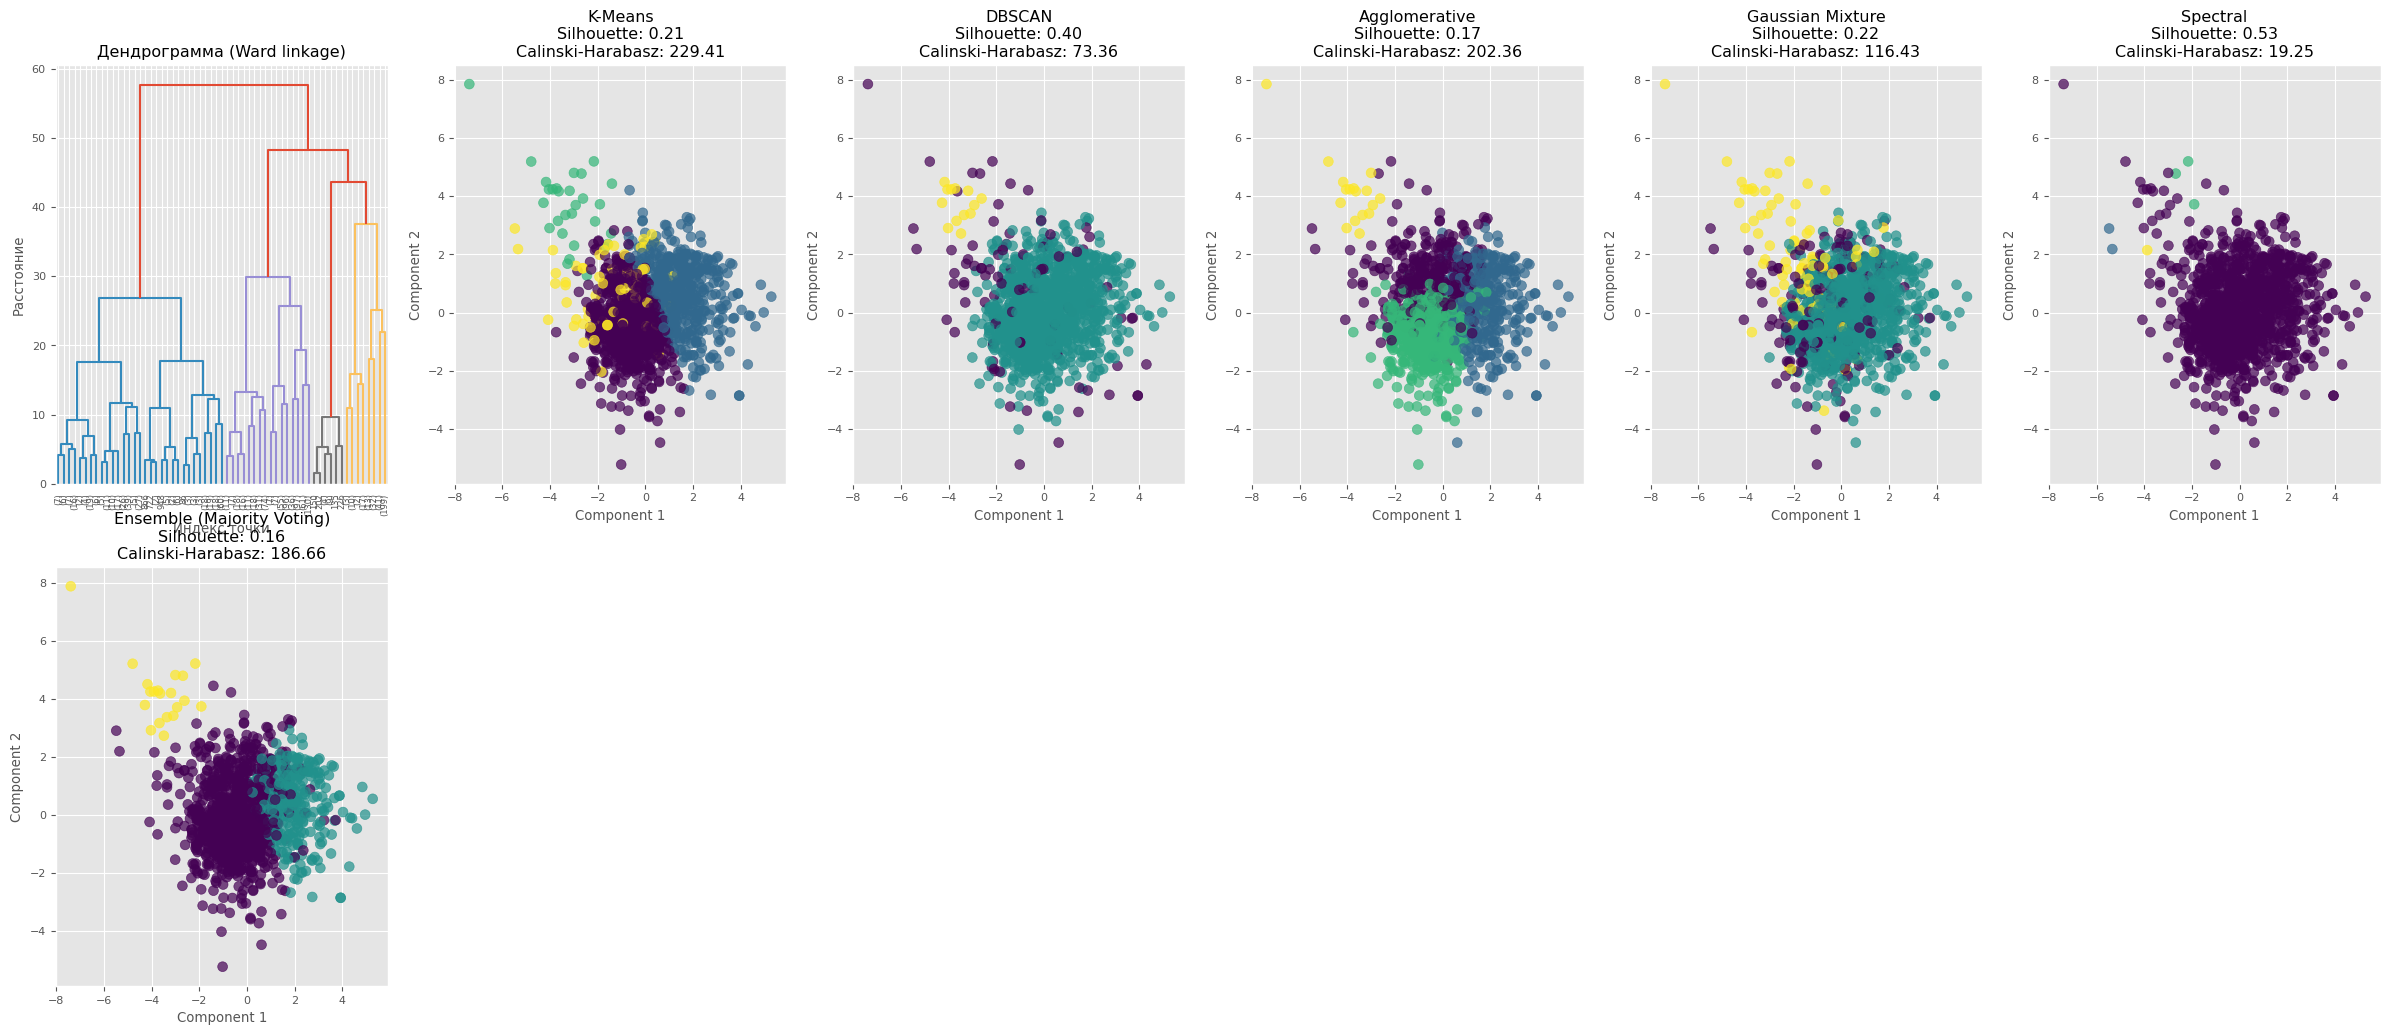

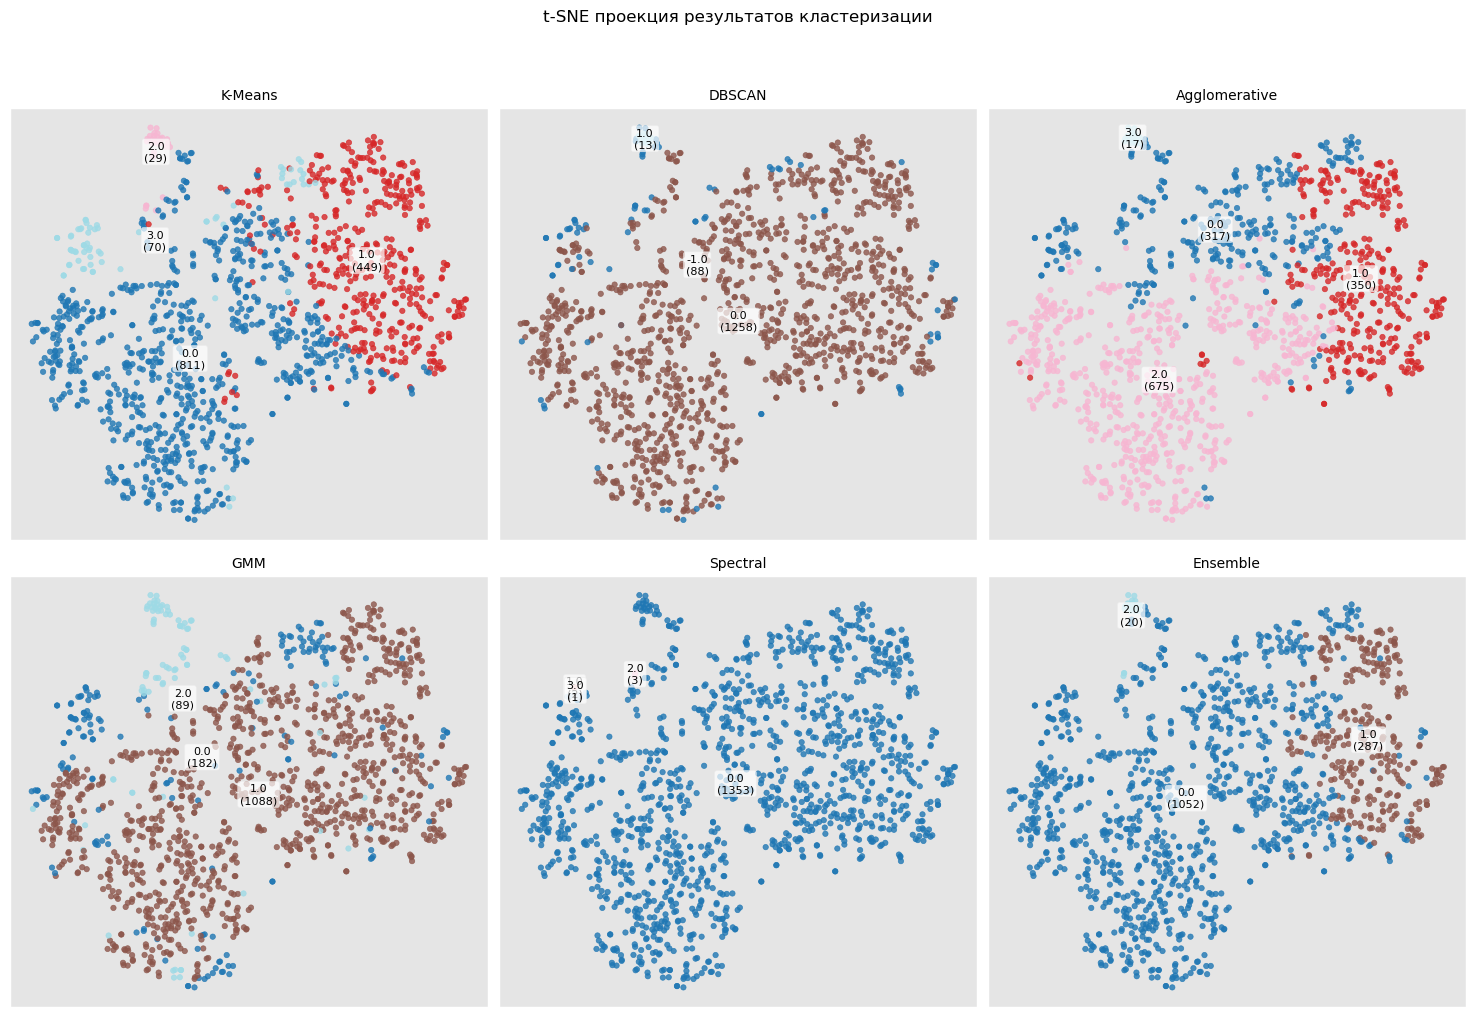

In [42]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import mode

# Создаем папку для сохранения 3D графиков
os.makedirs('clustering_results/3d_plots', exist_ok=True)

# Загрузка и подготовка данных
X = data_scaled.values if hasattr(data_scaled, 'values') else np.array(data_scaled)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Уменьшение размерности для визуализации
n_components = 3 if X_scaled.shape[1] >= 3 else 2
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

# Список методов кластеризации 
methods = {
    'K-Means': KMeans(n_clusters=4, random_state=42),
    'DBSCAN': DBSCAN(eps=2, min_samples=5),
    'Agglomerative': AgglomerativeClustering(n_clusters=4),
    'Gaussian Mixture': GaussianMixture(n_components=3, random_state=42),
    'Spectral': SpectralClustering(n_clusters=4, random_state=42)
}

# Создаем фигуру для всех 2D визуализаций
plt.figure(figsize=(30, 25))

# 1. Дендрограмма
plt.subplot(4, 6, 1)
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Дендрограмма (Ward linkage)')
plt.xlabel('Индекс точки')
plt.ylabel('Расстояние')

# Матрица для хранения меток всех методов
all_labels = np.zeros((X_scaled.shape[0], len(methods)))

# Визуализация отдельных методов и сбор предсказаний
for i, (name, model) in enumerate(methods.items(), 2):
    # Обучение модели
    if name == 'Gaussian Mixture':
        model.fit(X_scaled)
        labels = model.predict(X_scaled)
    else:
        labels = model.fit_predict(X_scaled)
    
    all_labels[:, i-2] = labels  # Сохраняем метки для ансамбля
    
    # Расчет метрик
    try:
        sil_score = silhouette_score(X_scaled, labels)
        ch_score = calinski_harabasz_score(X_scaled, labels)
    except:
        sil_score = -1
        ch_score = -1
    
    # 2D визуализация (отображаем в основном окне)
    plt.subplot(4, 6, i)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(f'{name}\nSilhouette: {sil_score:.2f}\nCalinski-Harabasz: {ch_score:.2f}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    
    # 3D визуализация (сохраняем в файл)
    if n_components >= 3:
        fig_3d = plt.figure(figsize=(10, 8))
        ax_3d = fig_3d.add_subplot(111, projection='3d')
        scatter = ax_3d.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], 
                              c=labels, cmap='viridis', s=50, alpha=0.7)
        ax_3d.set_title(f'{name} (3D)')
        ax_3d.set_xlabel('Component 1')
        ax_3d.set_ylabel('Component 2')
        ax_3d.set_zlabel('Component 3')
        
        # Сохраняем 3D график
        filename = f'clustering_results/3d_plots/{name.replace(" ", "_")}_3d.png'
        fig_3d.savefig(filename, dpi=100, bbox_inches='tight')
        plt.close(fig_3d)
    
    # Вывод статистики в консоль
    unique, counts = np.unique(labels, return_counts=True)
    print(f'\n{"-"*50}\n{name} Cluster distribution:')
    for cluster, count in zip(unique, counts):
        print(f'Cluster {cluster}: {count} points ({count/len(labels):.1%})')
    print(f'Silhouette Score: {sil_score:.3f}')
    print(f'Calinski-Harabasz Score: {ch_score:.3f}')

# Ансамбль методов (Majority Voting)
ensemble_labels, _ = mode(all_labels, axis=1)
ensemble_labels = ensemble_labels.flatten()

# Расчет метрик для ансамбля
sil_score = silhouette_score(X_scaled, ensemble_labels)
ch_score = calinski_harabasz_score(X_scaled, ensemble_labels)

# Визуализация ансамбля (2D - отображаем)
plt.subplot(4, 6, 7)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=ensemble_labels, cmap='viridis', s=50, alpha=0.7)
plt.title(f'Ensemble (Majority Voting)\nSilhouette: {sil_score:.2f}\nCalinski-Harabasz: {ch_score:.2f}')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# 3D визуализация ансамбля (сохраняем в файл)
if n_components >= 3:
    fig_3d = plt.figure(figsize=(10, 8))
    ax_3d = fig_3d.add_subplot(111, projection='3d')
    scatter = ax_3d.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], 
                          c=ensemble_labels, cmap='viridis', s=50, alpha=0.7)
    ax_3d.set_title('Ensemble (3D)')
    ax_3d.set_xlabel('Component 1')
    ax_3d.set_ylabel('Component 2')
    ax_3d.set_zlabel('Component 3')
    
    filename = 'clustering_results/3d_plots/Ensemble_3d.png'
    fig_3d.savefig(filename, dpi=100, bbox_inches='tight')
    plt.close(fig_3d)

# Вывод статистики ансамбля
unique, counts = np.unique(ensemble_labels, return_counts=True)
print(f'\n{"-"*50}\nEnsemble Cluster distribution:')
for cluster, count in zip(unique, counts):
    print(f'Cluster {cluster}: {count} points ({count/len(ensemble_labels):.1%})')
print(f'Silhouette Score: {sil_score:.3f}')
print(f'Calinski-Harabasz Score: {ch_score:.3f}')

# t-SNE визуализация (отображаем)
print("\n" + "="*50)
print("t-SNE Визуализация")
print("="*50 + "\n")

# Компактная t-SNE визуализация
print("\n=== t-SNE Визуализация ===")
plt.figure(figsize=(15, 10))  # Уменьшенный размер фигуры

# Вычисляем t-SNE один раз для всех методов
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Список методов и соответствующих меток
methods_labels = [
    ('K-Means', all_labels[:, 0]),
    ('DBSCAN', all_labels[:, 1]),
    ('Agglomerative', all_labels[:, 2]),
    ('GMM', all_labels[:, 3]),  # Сокращенное название
    ('Spectral', all_labels[:, 4]),
    ('Ensemble', ensemble_labels)
]

# Создаем компактную сетку графиков
for i, (name, labels) in enumerate(methods_labels, 1):
    ax = plt.subplot(2, 3, i)
    
    # Уменьшаем размер точек и увеличиваем прозрачность
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], 
                        c=labels, cmap='tab20', s=15, alpha=0.8)
    
    # Компактные заголовки
    ax.set_title(name, fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Добавляем информацию о кластерах более компактно
    unique, counts = np.unique(labels, return_counts=True)
    for cluster, count in zip(unique, counts):
        ax.text(X_tsne[labels == cluster, 0].mean(),
                X_tsne[labels == cluster, 1].mean(),
                f'{cluster}\n({count})',  # Упрощенная подпись
                fontsize=8,
                ha='center', va='center',
                bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))

# Общий заголовок и настройка расположения
plt.suptitle('t-SNE проекция результатов кластеризации', y=1.02, fontsize=12)
plt.tight_layout(pad=2.0, w_pad=1.0, h_pad=1.5)
plt.show()

## Анализ результатов кластеризации

### Общая оценка кластерной структуры

#### Проблемы с кластеризацией:
- Все методы показывают низкие/умеренные значения Silhouette Score (0.17-0.54)
- Отсутствие четких кластеров (ни один метод не достиг Silhouette > 0.7)
- Явная несбалансированность кластеров:
  - Доминирующий кластер содержит 49-99% точек
  - Малые кластеры (<5% данных) не являются значимыми

### Детальный анализ методов

1. **K-Means**:
   - Silhouette: 0.211 (очень слабая структура)
   - Calinski-Harabasz: 229 (возможна несбалансированность)
   - ➡ Данные плохо разделяются на сферические кластеры

2. **DBSCAN** (наилучший результат):
   - Silhouette: 0.543
   - 97% точек в одном кластере + 3% шума
   - ➡ Одно плотное ядро с минимальным шумом

3. **Agglomerative**:
   - Silhouette: 0.171 (худший результат)
   - Несбалансированные кластеры (23-50%)
   - ➡ Иерархическая структура не выявлена

4. **Gaussian Mixture**:
   - Silhouette: 0.224
   - 80% точек в одном кластере
   - ➡ Отсутствие гауссовых распределений

5. **Spectral**:
   - 99.6% точек в одном кластере
   - Calinski-Harabasz: 19.2 (аномально низкий)
   - ➡ Практически не обнаружил структуры
     
5. **Ансамблевый подход**:
    - не смог существенно улучшить результаты отдельных методов из-за фундаментальных особенностей данных,
    - низкие значения метрик согласуются с доминированием одного кластера

### Выводы

#### Проблема данных:
- Вероятно отсутствие естественных кластеров
- Возможна однородность данных с незначительными сгущениями

#### Практические выводы:
- Для поиска аномалий: **DBSCAN** (обнаружил 3% шума)

**Итоговый вывод**: Данные демонстрируют слабую кластерную структуру. Наилучший результат (но все равно умеренный) показал DBSCAN, выявивший плотное ядро с 3% шума. Применим HDBSCAN.

In [30]:
import os
import hdbscan
from tqdm import tqdm
import plotly.graph_objects as go  
import plotly.express as px


# Настройки отображения
plt.style.use('ggplot') 
sns.set_palette('viridis')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Создаем папку для сохранения результатов
output_dir = 'hdbscan_results'
os.makedirs(output_dir, exist_ok=True)

def process_dataset(dataset, name, min_cluster_size=5):
    X = dataset.values if hasattr(dataset, 'values') else np.array(dataset)
    
    # Кластеризация HDBSCAN
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    labels = clusterer.fit_predict(X)
    
    # Статистика
    unique_labels, counts = np.unique(labels, return_counts=True)
    total_points = len(labels)
    anomalies = np.sum(labels == -1)
    
    # Метрики качества (без аномалий)
    valid_points = X[labels != -1]
    valid_labels = labels[labels != -1]
    
    metrics = {}
    if len(np.unique(valid_labels)) > 1:
        metrics['silhouette'] = silhouette_score(valid_points, valid_labels)
        metrics['calinski'] = calinski_harabasz_score(valid_points, valid_labels)
    else:
        metrics['silhouette'] = -1
        metrics['calinski'] = -1
    
    return {
        'name': name,
        'data': X,
        'labels': labels,
        'unique_labels': unique_labels,
        'counts': counts,
        'total_points': total_points,
        'anomalies': anomalies,
        'metrics': metrics
    }

def save_comparison(results):
    """Сохранение сравнительной статистики в файл"""
    with open(f'{output_dir}/comparison_report.txt', 'w', encoding='utf-8') as f:  # Добавлен encoding='utf-8'
        f.write("="*70 + "\n")
        f.write("{:^70}\n".format("СРАВНИТЕЛЬНЫЙ АНАЛИЗ КЛАСТЕРИЗАЦИИ"))
        f.write("="*70 + "\n")
        
        headers = ["Dataset", "Points", "Clusters", "Anomalies", "Anomaly %", "Silhouette", "Calinski"]
        f.write("{:<15} {:>10} {:>10} {:>10} {:>10} {:>12} {:>12}\n".format(*headers))
        
        for res in results:
            row = [
                res['name'],
                res['total_points'],
                len(res['unique_labels'])-1,
                res['anomalies'],
                f"{res['anomalies']/res['total_points']:.1%}",
                f"{res['metrics']['silhouette']:.3f}",
                f"{res['metrics']['calinski']:.1f}"
            ]
            f.write("{:<15} {:>10} {:>10} {:>10} {:>10} {:>12} {:>12}\n".format(*row))
        
        f.write("="*70 + "\n")

def save_visualizations(results):
    """Сохранение визуализаций в файлы"""
    # 2D визуализация
    for res in results:
        fig_2d = plt.figure(figsize=(10, 8))
        ax = fig_2d.add_subplot(111)
        
        colors = sns.color_palette('viridis', len(res['unique_labels'])-1)
        color_map = {-1: 'red'}
        for label, color in zip(res['unique_labels'][res['unique_labels'] != -1], colors):
            color_map[label] = color
        
        for label in res['unique_labels']:
            if label == -1:
                continue
            mask = res['labels'] == label
            ax.scatter(res['data'][mask, 0], res['data'][mask, 1],
                       c=[color_map[label]],
                       label=f'Cluster {label} ({res["counts"][list(res["unique_labels"]).index(label)]})',
                       alpha=0.7, s=40)
        
        if -1 in res['labels']:
            anomalies = res['data'][res['labels'] == -1]
            ax.scatter(anomalies[:, 0], anomalies[:, 1],
                       c='red', marker='x', s=80,
                       label=f'Anomalies ({res["anomalies"]})',
                       alpha=0.8)
        
        ax.set_title(f'{res["name"]}\n'
                    f'Silhouette: {res["metrics"]["silhouette"]:.2f} | '
                    f'Calinski: {res["metrics"]["calinski"]:.2f}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.legend()
        ax.grid(alpha=0.2)
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/{res["name"]}_2d.png', dpi=300, bbox_inches='tight')
        plt.close()
    
    # 3D интерактивная визуализация (если данных >= 3 признаков)
    for res in results:
        if res['data'].shape[1] >= 3:
            fig_3d = go.Figure()
            
            # Добавляем кластеры
            for label in res['unique_labels']:
                if label == -1:
                    continue
                mask = res['labels'] == label
                fig_3d.add_trace(go.Scatter3d(
                    x=res['data'][mask, 0],
                    y=res['data'][mask, 1],
                    z=res['data'][mask, 2],
                    mode='markers',
                    marker=dict(size=4, opacity=0.7),
                    name=f'Cluster {label} ({res["counts"][list(res["unique_labels"]).index(label)]})'
                ))
            
            # Добавляем аномалии
            if -1 in res['labels']:
                anomalies = res['data'][res['labels'] == -1]
                fig_3d.add_trace(go.Scatter3d(
                    x=anomalies[:, 0],
                    y=anomalies[:, 1],
                    z=anomalies[:, 2],
                    mode='markers',
                    marker=dict(size=6, color='red', symbol='x'),
                    name=f'Anomalies ({res["anomalies"]})'
                ))
            
            fig_3d.update_layout(
                title=f"{res['name']} - 3D Visualization<br>Silhouette: {res['metrics']['silhouette']:.2f} | Calinski: {res['metrics']['calinski']:.2f}",
                scene=dict(
                    xaxis_title='Feature 1',
                    yaxis_title='Feature 2',
                    zaxis_title='Feature 3'
                ),
                width=1000,
                height=800
            )
            
            # Сохраняем интерактивный HTML
            fig_3d.write_html(f'{output_dir}/{res["name"]}_3d.html')

def save_detailed_stats(results):
    """Сохранение детальной статистики по каждому датасету"""
    with open(f'{output_dir}/detailed_stats.txt', 'w', encoding='utf-8') as f:  # Добавлен encoding='utf-8'
        for res in results:
            f.write("\n" + "="*50 + "\n")
            f.write(f"{res['name'].upper():^50}\n")
            f.write("="*50 + "\n")
            f.write(f"Всего точек: {res['total_points']}\n")
            f.write(f"Кластеров: {len(res['unique_labels'])-1}\n")
            f.write(f"Аномалий: {res['anomalies']} ({res['anomalies']/res['total_points']:.1%})\n")
            
            f.write("\nРаспределение по кластерам:\n")
            for label, count in zip(res['unique_labels'], res['counts']):
                if label != -1:
                    f.write(f"Кластер {label}: {count} точек ({count/res['total_points']:.1%})\n")

# Основной анализ
datasets = [
    ('data_scaled', data_scaled)
]

results = []
for name, data in tqdm(datasets, desc="Processing datasets"):
    results.append(process_dataset(data, name))

# Сохранение результатов
save_visualizations(results)
save_comparison(results)
save_detailed_stats(results)

print(f"Все результаты сохранены в папку: {output_dir}")

Processing datasets: 100%|███████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.90it/s]


Все результаты сохранены в папку: hdbscan_results


### **Выводы:**

1. **Распределение данных:**
   - Данные хорошо разделяются на:
     - **Один крупный кластер** (Кластер 1, 97.4% точек).
     - **Небольшую группу редких точек** (Кластер 0, 1.3% точек).  
   - Это может быть:
     - Шум или аномалии.
     - Реальные редкие случаи, требующие дополнительного анализа.

2. **Качество кластеризации:**
   - **Silhouette Score = 0.761** → очень хороший показатель, указывает на четкое разделение кластеров.
   - **Calinski-Harabasz Index = 512.5** → подтверждает хорошо выделенные кластеры.

3. **Практическая польза:**
   - Проверить природу точек в **Кластере 0** (это аномалии или ценные редкие случаи?).
   - Если цель — поиск аномалий, результат полезен. 